In [1]:
# load the mnist data
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


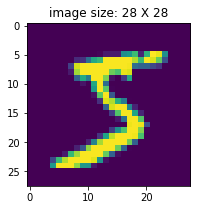

In [3]:
#visualize the data
img1 = X_train[0]
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('image size: 28 X 28')
plt.show()

In [4]:
img1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#format the input data
feature_size = img1.shape[0]*img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)


print(X_train_format.shape)

(60000, 784)


In [6]:
#normalize the input data
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
#format the output data(labels)
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
print(X_train_normal.shape,y_train_format.shape)

(60000, 784) (60000, 10)


![mlp](images/mlp.png)

In [9]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392,activation='relu',input_dim=784))
mlp.add(Dense(units=392,activation='relu'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
#configure the model
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [11]:
#train the model
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.1849 - categorical_accuracy: 0.9435
Epoch 2/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0799 - categorical_accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0544 - categorical_accuracy: 0.9830
Epoch 4/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0442 - categorical_accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0342 - categorical_accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0286 - categorical_accuracy: 0.9903
Epoch 7/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0241 - categorical_accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0237 - categorical_accuracy: 0.9922
Epoch 9/10
60000/60000 [========================

In [12]:
#evaluate the model
y_train_predict = mlp.predict_classes(X_train_normal)
print(type(y_train_predict))


<class 'numpy.ndarray'>


In [13]:
print(y_train_predict[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [14]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9954


In [15]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9806


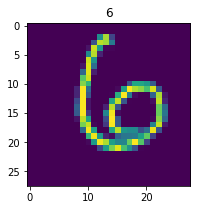

In [16]:
img2 = X_test[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[100])
plt.show()

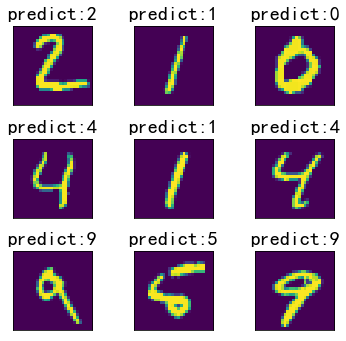

In [17]:
# coding:utf-8
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
a = [i for i in range(1,10)]
fig4 = plt.figure(figsize=(5,5))
for i in a:
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.imshow(X_test[i])
    plt.title('predict:{}'.format(y_test_predict[i]),font2)
    plt.xticks([])
    plt.yticks([])